In [1]:
import numpy as np
import pandas as pd
import string
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns



## 1. WE MUST IDENTIFY AND REMOVE OUTLIERS IF ANY CUZ THE RANGE OF NORMALISATION IS WRONG
2.find the right location of the following tatle :Show a summary of all missing values as well as the summary statistics



# <font color=green>Part 1 - Building up a basic predictive model</font>

   ## <font color=blue>1. Data cleaning and transformation: </font>

### <div class="alert alert-info">Show the shape of the dataset</div>

In [2]:
df = pd.read_csv('Manhattan12.csv', encoding = "ISO-8859-1")

Show the shape of the dataset

In [3]:
df.shape

(27399, 21)

In [4]:
df.head()

,ï»¿Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [5]:
df = df.drop(range(3))
df.head()

,ï»¿Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013


### <div class="alert alert-info">Rename incorrectly formatted column names (e.g. SALE\nPRICE)</div>

In [6]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [7]:
df.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [8]:
df.columns = [x.replace("\n", " ") for x in df.columns.to_list()]

In [9]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,$0,29/04/2013
27395,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,"$495,000",26/06/2013
27396,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,$0,02/04/2013
27397,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,$0,26/06/2013


### <div class="alert alert-info">Create list of categorical variables and another for the numerical variables</div>

<font color='red'>
    Please read the following information before continue, thank you</font>
<font color='green'> 
    In this part, some of the data is number only, but it won't make since to find outlier or calculate. for example, the zip code and Block number, in many situations. In this CW, the house's price and size may affect each other. Although, the location will affect the price of the house, but due to its high repeatability and subjective coding method (zip code and address information written by the government or staff), the traditional data method is not suitable for these data. For example, it doesn't make sense to do a look-ahead analysis of the zip code, or a box plot.
    When we try to classify the data, we classify zip code, block, lot, into numerical simply because they are numbers. We don't claim to calculate them.</font>

In [10]:
df.dtypes

BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                             object
LOT                               object
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APART MENT NUMBER                 object
ZIP CODE                          object
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                  object
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                        object
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [11]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,400,,V1,44 FAIRVIEW AVENUE,,...,0,0,0,"16,217",0,0,4,V1,$0,29/04/2013
27395,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,"$495,000",26/06/2013
27396,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,75,,V1,BENNETT AVENUE,,...,0,0,0,"4,150",0,0,4,V1,$0,02/04/2013
27397,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,76,,V1,N/A MAGAW PLACE,,...,0,0,0,760,0,0,4,V1,$0,26/06/2013


In [12]:
df_categorical = df[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ADDRESS", "APART MENT NUMBER", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE","EASE-MENT","BLOCK",'ZIP CODE','LOT','BOROUGH', "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "SALE DATE"]]

In [13]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1306,1,0,0,0,20/05/2013
5,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1307,1,0,0,0,16/05/2013
6,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1308,1,0,0,0,23/05/2013
7,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1309,1,0,0,0,15/05/2013
8,,13 CONDOS - ELEVATOR APARTMENTS,,,345 WEST 14TH STREET,,R4,2,,738,10014,1310,1,0,0,0,13/05/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,44 FAIRVIEW AVENUE,,V1,4,,2170,10040,400,1,0,0,0,29/04/2013
27395,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,BENNETT AVENUE,,V1,4,,2180,10033,75,1,0,0,0,26/06/2013
27396,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,BENNETT AVENUE,,V1,4,,2180,10033,75,1,0,0,0,02/04/2013
27397,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,V1,N/A MAGAW PLACE,,V1,4,,2180,10033,76,1,0,0,0,26/06/2013


In [77]:
df_numerical = df[["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE", "YEAR BUILT", "SALE DATE"]]


In [78]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT,SALE DATE
Index,,,,,
4,0,0,"$2,214,693",0,20/05/2013
5,0,0,"$1,654,656",0,16/05/2013
6,0,0,"$1,069,162",0,23/05/2013
7,0,0,"$1,374,637",0,15/05/2013
8,0,0,"$1,649,565",0,13/05/2013
...,...,...,...,...,...
27394,"16,217",0,$0,0,29/04/2013
27395,"4,150",0,"$495,000",0,26/06/2013
27396,"4,150",0,$0,0,02/04/2013


### <div class="alert alert-info">For each numerical column, remove the ',' the '$' for the sale price, and then convert them to numeric.</div>

In [16]:
df_numerical = df_numerical.replace(',','', regex=True)

In [17]:
df_numerical["SALE PRICE"] = df_numerical["SALE PRICE"].replace({'\$':''}, regex = True)

In [18]:
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce', axis=1)

In [19]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
4,0,0,2214693,0
5,0,0,1654656,0
6,0,0,1069162,0
7,0,0,1374637,0
8,0,0,1649565,0
...,...,...,...,...
27394,16217,0,0,0
27395,4150,0,495000,0
27396,4150,0,0,0
27397,760,0,0,0


In [20]:
df_numerical.dtypes

LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
SALE PRICE           int64
YEAR BUILT           int64
dtype: object

In [21]:
is_numeric_dtype(df_categorical['BOROUGH'])

False

# CATEGORICAL

### <div class="alert alert-info">Convert the 'SALE DATE' to datetime.</div>

In [22]:
df_categorical["SALE DATE"] = pd.to_datetime(df_categorical["SALE DATE"])

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Par

In [23]:
df_numerical.dtypes

LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
SALE PRICE           int64
YEAR BUILT           int64
dtype: object

### <div class="alert alert-info">For each categorical variable, remove the spaces, and then replace the empty
string '' by NaN.</div>

In [24]:
df_categorical = df_categorical.replace(' ','', regex=True)

In [25]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2,,738,10014,1306,1,0,0,0,2013-05-20
5,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2,,738,10014,1307,1,0,0,0,2013-05-16
6,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2,,738,10014,1308,1,0,0,0,2013-05-23
7,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2,,738,10014,1309,1,0,0,0,2013-05-15
8,,13CONDOS-ELEVATORAPARTMENTS,,,345WEST14THSTREET,,R4,2,,738,10014,1310,1,0,0,0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,,V1,4,,2170,10040,400,1,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,,V1,4,,2180,10033,75,1,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,,V1,4,,2180,10033,75,1,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,,V1,4,,2180,10033,76,1,0,0,0,2013-06-26


In [26]:
df_categorical.replace(r'^\s*$', np.nan, regex=True)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1306,1,0,0,0,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1307,1,0,0,0,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1308,1,0,0,0,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1309,1,0,0,0,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1310,1,0,0,0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,NaN,V1,4,NaN,2170,10040,400,1,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,NaN,V1,4,NaN,2180,10033,76,1,0,0,0,2013-06-26


### <div class="alert alert-info">Replace the zeros in Prices, Land squares, etc. by NaN</div>

In [27]:
df_numerical = df_numerical.replace(0, np.nan)

In [28]:
df_numerical=df_numerical.dropna()

In [29]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27382,17275.0,34570.0,5183000.0,1927.0
27384,17925.0,5226.0,6000000.0,1935.0
27385,17925.0,5226.0,6000000.0,1935.0
27386,15000.0,2465.0,12000000.0,1971.0


In [30]:
df_categorical = df_categorical.replace("", np.nan)

In [31]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,EASE-MENT,BLOCK,ZIP CODE,LOT,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1306,1,0,0,0,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1307,1,0,0,0,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1308,1,0,0,0,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1309,1,0,0,0,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,NaN,R4,2,NaN,738,10014,1310,1,0,0,0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,NaN,V1,4,NaN,2170,10040,400,1,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,NaN,V1,4,NaN,2180,10033,75,1,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,NaN,V1,4,NaN,2180,10033,76,1,0,0,0,2013-06-26


###  <div class="alert alert-info">Show a summary of all missing values as well as the summary statistics</div>

In [32]:
df_numerical.describe()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
count,2759.000000,2759.000000,2.759000e+03,2759.000000
mean,6262.634650,65744.841247,8.204364e+06,1956.421167
std,7937.895426,71047.538927,3.841248e+07,47.809283
min,469.000000,999.000000,1.000000e+00,1800.000000
25%,2320.000000,7171.000000,5.790000e+04,1910.000000
50%,7532.000000,52290.000000,7.500000e+05,1930.000000
75%,7532.000000,112850.000000,5.166704e+06,2007.000000
max,213650.000000,940000.000000,1.100000e+09,2013.000000


In [33]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2759 entries, 22 to 27390
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAND SQUARE FEET   2759 non-null   float64
 1   GROSS SQUARE FEET  2759 non-null   float64
 2   SALE PRICE         2759 non-null   float64
 3   YEAR BUILT         2759 non-null   float64
dtypes: float64(4)
memory usage: 107.8 KB


In [34]:
df_numerical.value_counts()

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE   YEAR BUILT
7532.0            112850.0           57900.0      2007.0        272
                                     58900.0      2007.0         88
                                     42400.0      2007.0         80
                                     112905.0     2007.0         20
                                     48205.0      2007.0         19
                                                               ... 
2250.0            9150.0             4750000.0    1900.0          1
2248.0            6956.0             4900000.0    1926.0          1
                  4730.0             5750000.0    1910.0          1
                  1938.0             250000.0     1901.0          1
213650.0          940000.0           540829842.0  1933.0          1
Length: 1989, dtype: int64

In [35]:
df_numerical.corr()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
LAND SQUARE FEET,1.000000,0.687654,0.378903,0.219121
GROSS SQUARE FEET,0.687654,1.000000,0.443534,0.631768
SALE PRICE,0.378903,0.443534,1.000000,-0.088769
YEAR BUILT,0.219121,0.631768,-0.088769,1.000000


array([[<AxesSubplot:title={'center':'LAND SQUARE FEET'}>,
        <AxesSubplot:title={'center':'GROSS SQUARE FEET'}>],
       [<AxesSubplot:title={'center':'SALE PRICE'}>,
        <AxesSubplot:title={'center':'YEAR BUILT'}>]], dtype=object)

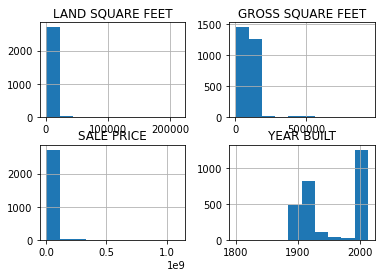

In [36]:
df_numerical.hist()

### <div class="alert alert-info">Drop the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'</div>

In [37]:
df_categorical = df_categorical.drop(["BOROUGH"], axis='columns')

In [38]:
df_categorical = df_categorical.drop(["APART MENT NUMBER", "EASE-MENT"], axis='columns')

In [39]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27382,17275.0,34570.0,5183000.0,1927.0
27384,17925.0,5226.0,6000000.0,1935.0
27385,17925.0,5226.0,6000000.0,1935.0
27386,15000.0,2465.0,12000000.0,1971.0


In [40]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1306,0,0,0,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1307,0,0,0,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1308,0,0,0,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1309,0,0,0,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1310,0,0,0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,V1,4,2180,10033,76,0,0,0,2013-06-26


### <div class="alert alert-info">Drop duplicates if any</div>

In [41]:
df_categorical.drop_duplicates(keep = False)


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1306,0,0,0,2013-05-20
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1307,0,0,0,2013-05-16
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1308,0,0,0,2013-05-23
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1309,0,0,0,2013-05-15
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,NaN,345WEST14THSTREET,R4,2,738,10014,1310,0,0,0,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,V1,4,2180,10033,76,0,0,0,2013-06-26


In [42]:
df_numerical.drop_duplicates(keep = False)

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27379,7900.0,6438.0,7300000.0,1925.0
27380,10000.0,20000.0,1500000.0,1991.0
27382,17275.0,34570.0,5183000.0,1927.0
27386,15000.0,2465.0,12000000.0,1971.0


### <div class="alert alert-info">Drop rows with NaN values</div>

In [43]:
df_categorical.dropna()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
22,ALPHABETCITY,03THREEFAMILYHOMES,1,C0,243EAST7THSTREET,C0,1,377,10009,66,3,0,3,2013-06-03
23,ALPHABETCITY,04TAXCLASS1CONDOS,1C,R6,238EAST4THSTREET,R6,1,399,10009,1102,1,0,1,2013-03-27
24,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,303EAST4THSTREET,C7,2,374,10009,1,8,2,10,2013-05-02
25,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,715EAST5THSTREET,C4,2,375,10009,62,20,0,20,2012-06-09
26,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,274EASTSEVENTHSTREET,C4,2,376,10009,30,13,0,13,2012-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-02-04
27397,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,N/AMAGAWPLACE,V1,4,2180,10033,76,0,0,0,2013-06-26


In [44]:
df_numerical.dropna()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27382,17275.0,34570.0,5183000.0,1927.0
27384,17925.0,5226.0,6000000.0,1935.0
27385,17925.0,5226.0,6000000.0,1935.0
27386,15000.0,2465.0,12000000.0,1971.0


### <div class="alert alert-info">Identify and remove outliers if any</div>

### <div class="alert alert-info">Show the shape of the resulting dataframe.</div>

In [45]:
df_categorical.shape

(27395, 14)

In [46]:
df_numerical.shape

(2759, 4)

### <div class="alert alert-info">Consider the log of the prices and normalise the data.</div>

In [47]:
df_numerical["SALE PRICE"].max()


1100000000.0

In [48]:
df_numerical["SALE PRICE"].min()

1.0

In [49]:
price_normalisation = df_numerical["SALE PRICE"]

In [50]:
df_log = np.log(price_normalisation)

In [51]:
scaler = MinMaxScaler(feature_range=(1, 1307965050))

### <div class="alert alert-info">remember to complete normalisation of data</div>

In [52]:
df_numerical.index.names = ['Index']
df_categorical.index.names = ['Index']

In [53]:
df_numerical

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT
Index,,,,
22,2381.0,3084.0,3150000.0,1899.0
25,2426.0,9345.0,3650000.0,1900.0
26,2726.0,13002.0,895250.0,1910.0
28,2093.0,5852.0,283.0,1997.0
29,2164.0,9071.0,3500000.0,1900.0
...,...,...,...,...
27382,17275.0,34570.0,5183000.0,1927.0
27384,17925.0,5226.0,6000000.0,1935.0
27385,17925.0,5226.0,6000000.0,1935.0


In [54]:

df_categorical.dropna(how='any', inplace=True)


In [55]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
Index,,,,,,,,,,,,,,
22,ALPHABETCITY,03THREEFAMILYHOMES,1,C0,243EAST7THSTREET,C0,1,377,10009,66,3,0,3,2013-06-03
23,ALPHABETCITY,04TAXCLASS1CONDOS,1C,R6,238EAST4THSTREET,R6,1,399,10009,1102,1,0,1,2013-03-27
24,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,303EAST4THSTREET,C7,2,374,10009,1,8,2,10,2013-05-02
25,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,715EAST5THSTREET,C4,2,375,10009,62,20,0,20,2012-06-09
26,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,274EASTSEVENTHSTREET,C4,2,376,10009,30,13,0,13,2012-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-02-04


## <font color=blue>2. Data Exploration</font>

### <div class="alert alert-info">Visualise the prices across neighborhood</div>

In [56]:
extracted_col = df_numerical["SALE PRICE"]
display(extracted_col)

Index
22        3150000.0
25        3650000.0
26         895250.0
28            283.0
29        3500000.0
            ...    
27382     5183000.0
27384     6000000.0
27385     6000000.0
27386    12000000.0
27390     4917000.0
Name: SALE PRICE, Length: 2759, dtype: float64

In [57]:
df_price_neighbourhood = df_categorical.join(extracted_col)
df_price_neighbourhood.dropna(how='any', inplace=True)

In [58]:
df_price_neighbourhood

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE,SALE PRICE
Index,,,,,,,,,,,,,,,
22,ALPHABETCITY,03THREEFAMILYHOMES,1,C0,243EAST7THSTREET,C0,1,377,10009,66,3,0,3,2013-06-03,3150000.0
25,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,715EAST5THSTREET,C4,2,375,10009,62,20,0,20,2012-06-09,3650000.0
26,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,274EASTSEVENTHSTREET,C4,2,376,10009,30,13,0,13,2012-10-25,895250.0
28,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,17AVENUEB,C7,2,385,10009,1,7,1,8,2013-04-18,283.0
29,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,309EAST8THSTREET,C4,2,391,10009,55,17,0,17,2012-10-16,3500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27382,WASHINGTONHEIGHTSUPPER,27FACTORIES,4,F9,290DYCKMANSTREET,F9,4,2246,10034,28,0,1,1,2012-11-09,5183000.0
27384,WASHINGTONHEIGHTSUPPER,29COMMERCIALGARAGES,4,G9,2430AMSTERDAMAVENUE,G9,4,2152,10033,77,0,1,1,2013-05-30,6000000.0
27385,WASHINGTONHEIGHTSUPPER,29COMMERCIALGARAGES,4,G9,2430AMSTERDAMAVENUE,G9,4,2152,10033,77,0,1,1,2013-01-31,6000000.0


In [59]:
df_neighbourhoodPrice = df_price_neighbourhood[['NEIGHBORHOOD', "SALE PRICE"]].copy()
df_neighbourhoodPrice

,NEIGHBORHOOD,SALE PRICE
Index,,
22,ALPHABETCITY,3150000.0
25,ALPHABETCITY,3650000.0
26,ALPHABETCITY,895250.0
28,ALPHABETCITY,283.0
29,ALPHABETCITY,3500000.0
...,...,...
27382,WASHINGTONHEIGHTSUPPER,5183000.0
27384,WASHINGTONHEIGHTSUPPER,6000000.0
27385,WASHINGTONHEIGHTSUPPER,6000000.0


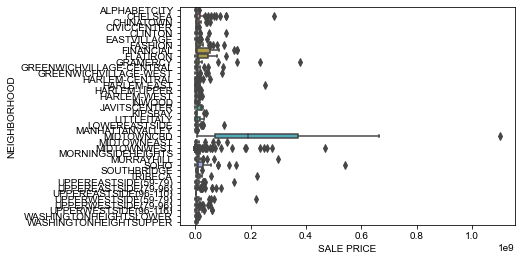

In [60]:
sns.boxplot(x="SALE PRICE", y="NEIGHBORHOOD", data= df_neighbourhoodPrice)
sns.set(rc={'figure.figsize':(100,20)})
plt.show()

In [61]:
neighbourNames = df_price_neighbourhood.NEIGHBORHOOD.unique()


In [62]:
neighbourNames

array(['ALPHABETCITY', 'CHELSEA', 'CHINATOWN', 'CIVICCENTER', 'CLINTON',
       'EASTVILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICHVILLAGE-CENTRAL', 'GREENWICHVILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITSCENTER', 'KIPSBAY', 'LITTLEITALY',
       'LOWEREASTSIDE', 'MANHATTANVALLEY', 'MIDTOWNCBD', 'MIDTOWNEAST',
       'MIDTOWNWEST', 'MORNINGSIDEHEIGHTS', 'MURRAYHILL', 'SOHO',
       'SOUTHBRIDGE', 'TRIBECA', 'UPPEREASTSIDE(59-79)',
       'UPPEREASTSIDE(79-96)', 'UPPEREASTSIDE(96-110)',
       'UPPERWESTSIDE(59-79)', 'UPPERWESTSIDE(79-96)',
       'UPPERWESTSIDE(96-116)', 'WASHINGTONHEIGHTSLOWER',
       'WASHINGTONHEIGHTSUPPER'], dtype=object)

In [63]:
DataFrameDict = {elem : pd.DataFrame() for elem in neighbourNames}

In [64]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = df_price_neighbourhood[:][df_price_neighbourhood.NEIGHBORHOOD == key]

In [65]:
df_nh1 = DataFrameDict['ALPHABETCITY']

<AxesSubplot:xlabel='NEIGHBORHOOD'>

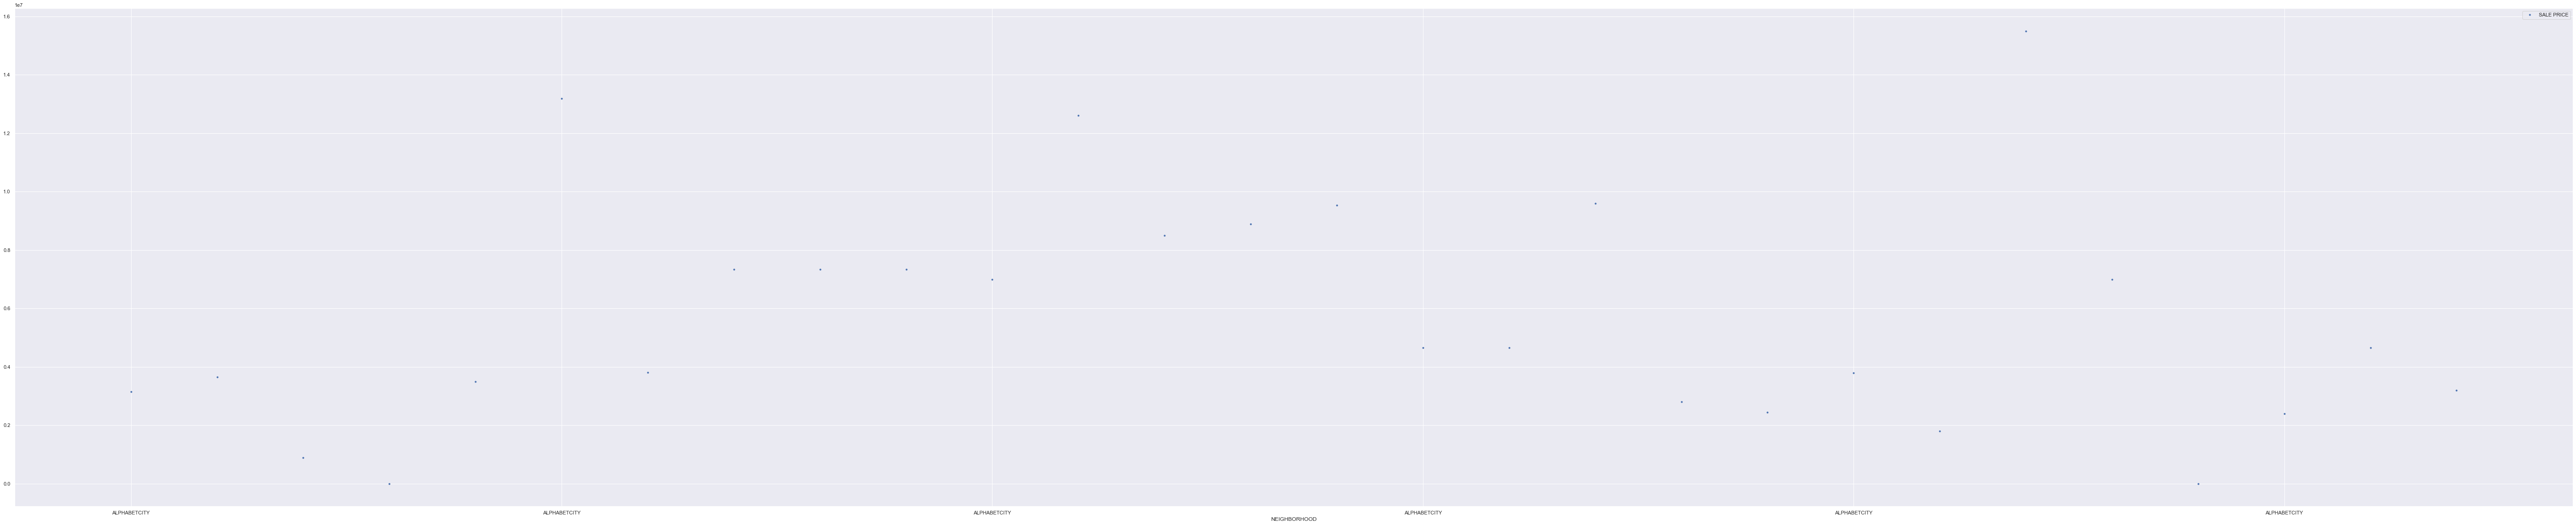

In [66]:
DataFrameDict['ALPHABETCITY'].plot(x='NEIGHBORHOOD', y='SALE PRICE', style='.')


In [67]:
elements = df_nh1

boxplot &conditional plot
在part 2部分，可以考虑比较房子的年龄（sold year - build year）和价格的关系。因为价格是来自于sold year，而不是实时的报价，换句话说现在

### <div class="alert alert-info">Visualise the prices over time</div>

In [68]:
extracted_col = df_numerical["SALE PRICE"]
display(extracted_col)

Index
22        3150000.0
25        3650000.0
26         895250.0
28            283.0
29        3500000.0
            ...    
27382     5183000.0
27384     6000000.0
27385     6000000.0
27386    12000000.0
27390     4917000.0
Name: SALE PRICE, Length: 2759, dtype: float64

### <div class="alert alert-info">Show the scatter matrix plot and the correlation matrix</div>

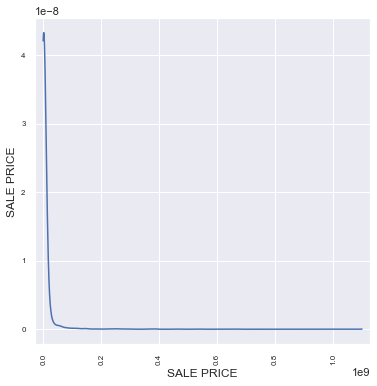

In [69]:
pd.plotting.scatter_matrix(df_neighbourhoodPrice, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [70]:
corr_matrix = df_neighbourhoodPrice.corr()
print(corr_matrix)

            SALE PRICE
SALE PRICE         1.0


取决于time& price

### <div class="alert alert-info">Any further plots, which demonstrate your understanding of the data</div>

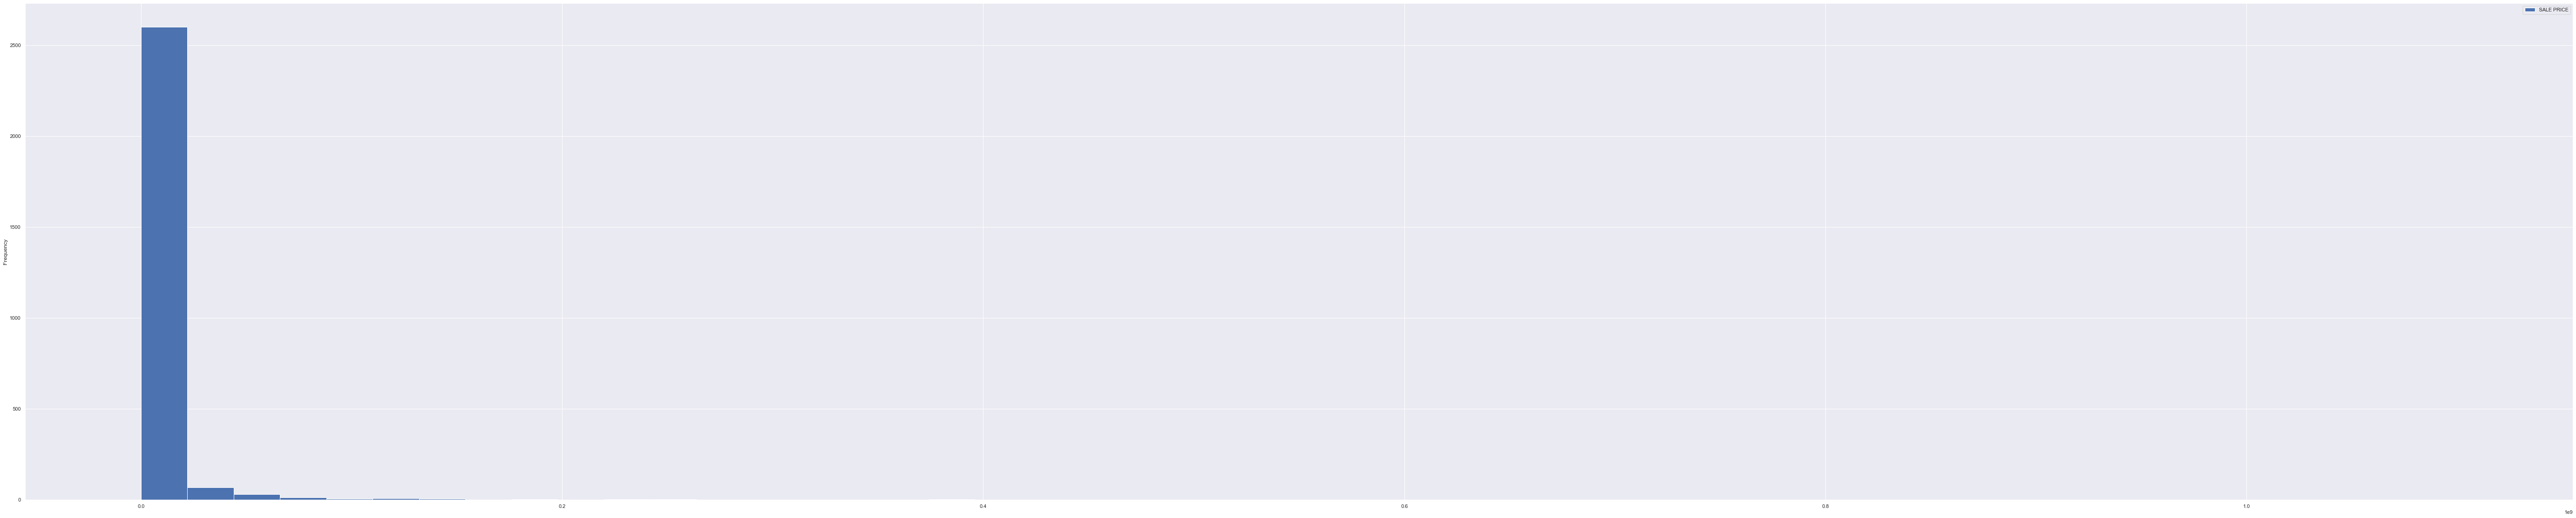

In [71]:
df_neighbourhoodPrice.plot(kind='hist', bins=50)
plt.show()

## <font color=blue>3.Model building</font>

### <div class="alert alert-info">Select the predictors that would have impact in predicting house prices. </div>

In [72]:
df_categorical

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,ZIP CODE,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE
Index,,,,,,,,,,,,,,
22,ALPHABETCITY,03THREEFAMILYHOMES,1,C0,243EAST7THSTREET,C0,1,377,10009,66,3,0,3,2013-06-03
23,ALPHABETCITY,04TAXCLASS1CONDOS,1C,R6,238EAST4THSTREET,R6,1,399,10009,1102,1,0,1,2013-03-27
24,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2B,C7,303EAST4THSTREET,C7,2,374,10009,1,8,2,10,2013-05-02
25,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,715EAST5THSTREET,C4,2,375,10009,62,20,0,20,2012-06-09
26,ALPHABETCITY,07RENTALS-WALKUPAPARTMENTS,2,C4,274EASTSEVENTHSTREET,C4,2,376,10009,30,13,0,13,2012-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,44FAIRVIEWAVENUE,V1,4,2170,10040,400,0,0,0,2013-04-29
27395,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-06-26
27396,WASHINGTONHEIGHTSUPPER,31COMMERCIALVACANTLAND,4,V1,BENNETTAVENUE,V1,4,2180,10033,75,0,0,0,2013-02-04


In [73]:
extracted_col = df_numerical["SALE PRICE"]
display(extracted_col)

Index
22        3150000.0
25        3650000.0
26         895250.0
28            283.0
29        3500000.0
            ...    
27382     5183000.0
27384     6000000.0
27385     6000000.0
27386    12000000.0
27390     4917000.0
Name: SALE PRICE, Length: 2759, dtype: float64

In [74]:
extracted_col2 = df_categorical["SALE DATE"]
display(extracted_col2)

Index
22      2013-06-03
23      2013-03-27
24      2013-05-02
25      2012-06-09
26      2012-10-25
           ...    
27394   2013-04-29
27395   2013-06-26
27396   2013-02-04
27397   2013-06-26
27398   2013-02-04
Name: SALE DATE, Length: 23818, dtype: datetime64[ns]

In [81]:
df_houseAge = pd.DataFrame({"SALE DATE": df_categorical["SALE DATE"], 'SALE PRICE': df_numerical["SALE PRICE"]})
df_houseAge=df_houseAge.dropna()
#remember to assign variable dataframe for all other 

df_houseAge


,SALE DATE,SALE PRICE
Index,,
22,2013-06-03,"$3,150,000"
23,2013-03-27,"$3,450,000"
24,2013-05-02,$0
25,2012-06-09,"$3,650,000"
26,2012-10-25,"$895,250"
...,...,...
27394,2013-04-29,$0
27395,2013-06-26,"$495,000"
27396,2013-02-04,$0


### <div class="alert alert-info">Build up a first linear model with appropriate predictors and evaluate it. Split the data into a training and test sets; build up the model; and then show a histogram of the residuals. Evaluate your model by using a cross-validation procedure.</div>

# <font color=green>Part 2 - Improved model</font>

### <div class="alert alert-warning">1. Consider the entire datasets given in this assignment. Develop an improved predictive model that predicts the sales prices of houses. Make sure to validate your model. You should aim for a model with a higher performance while using a maximum of data points. This implies treating missing values differently for example through imputation rather than dropping them.</div>

### <div class="alert alert-warning">2. Use the K-Means algorithm to cluster your cleansed dataset and compare the obtained clusters with the distribution found in the data. Justify your clustering and visualise your clusters as appropriate.</div>

### <div class="alert alert-warning">3. Build up local regressors based on your clustering and discuss how this clusters-based regression compares to your regression model obtained in Part 2. 1.</div>